In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('AllSales2012-2013.csv', sep=';', header=0)

### Grouping by:
1. Model
2. Model + color
3. Model + size
4. Model + size + color
5. Size
7. Class

### Metrics
1. Quantity of sale
2. Total gross income = UnitPrice * Quantity - StandardCost * quantity
3. ROI

###### Preparing data

In [4]:
df.head(1)

,ProductID,ListPrice,StandardCost,Color,Size,Weight,Style,class,BikeName,ModelName,SubName,CatName,UnitPrice,UnitPriceDiscount,OrderQty,SalesOrderID,TotalDue,SubTotal,TerritoryID,OrderDate,SellStartDate,SellEndDate
0,786,"1079,99","598,4354",Black,40,25.77,U,M,"Mountain-300 Black, 40",Mountain-300,Mountain Bikes,Bikes,"647,994","0,00",3,46604,"41824,897","37141,1313",5,2012-05-30 00:00:00.000,2012-05-30 00:00:00.000,2013-05-29 00:00:00.000


There are values with decimals splited by ",". Python can not read it as value, so I will change "," to "." and change type to float

In [5]:
df['UnitPrice'] = df[['UnitPrice']].applymap(lambda x: str(x.replace(',','.'))).astype('float')
df['StandardCost'] = df[['StandardCost']].applymap(lambda x: str(x.replace(',','.'))).astype('float')
df['UnitPriceDiscount'] = df[['UnitPriceDiscount']].applymap(lambda x: str(x.replace(',','.'))).astype('float')
df['SubTotal'] = df[['SubTotal']].applymap(lambda x: str(x.replace(',','.'))).astype('float')
df['ListPrice'] = df[['ListPrice']].applymap(lambda x: str(x.replace(',','.'))).astype('float')

In [6]:
from datetime import datetime

Must change datetime format in start/end sellDate

In [7]:
df['SellStartDate'] =  pd.to_datetime(df['SellStartDate'])

df['SellEndDate'] =  pd.to_datetime(df['SellEndDate'])

Now I will save new DF

In [8]:
df.to_csv('AllSales2012-2013Prepared.csv', index=False)

In [9]:
df = pd.read_csv('AllSales2012-2013Prepared.csv')

I need only bikes so I can drop the rest of the orders

In [10]:
bikes = df[df['CatName'] == 'Bikes'].copy()

Counting total income and ROI on each bike

In [11]:
df.head(1)

,ProductID,ListPrice,StandardCost,Color,Size,Weight,Style,class,BikeName,ModelName,SubName,CatName,UnitPrice,UnitPriceDiscount,OrderQty,SalesOrderID,TotalDue,SubTotal,TerritoryID,OrderDate,SellStartDate,SellEndDate
0,786,1079.99,598.4354,Black,40,25.77,U,M,"Mountain-300 Black, 40",Mountain-300,Mountain Bikes,Bikes,647.994,0.0,3,46604,"41824,897",37141.1313,5,2012-05-30 00:00:00.000,2012-05-30,2013-05-29


In [12]:
bikes['GrossProfit'] = (bikes['UnitPrice'] *(1-df['UnitPriceDiscount']) - bikes['StandardCost']) * bikes['OrderQty']

In [13]:
bikes['ROI'] = bikes['GrossProfit'] / (bikes['StandardCost'] * bikes['OrderQty'])

In [14]:
ModelsSale = bikes.groupby(['ModelName']).agg({'OrderQty':['sum'], 'GrossProfit': ['mean', 'sum'], 'ROI':['mean']})

In [15]:
ModelsSale['GrossProfit']['sum'].sum()

585703.8198950011

GrossProfit from Selling Bikes betewteen 05.2012-05.2013

In [16]:
ModelsSale

OrderQty GrossProfit                      ROI
                  sum        mean            sum      mean
ModelName                                                 
Mountain-200     6975  255.843220  713802.582700  0.233936
Mountain-300     2947  160.693799  143660.256320  0.082431
Road-250         5685   50.985844  134449.670357  0.159372
Road-550-W       3425 -190.212614 -246705.760716 -0.003998
Road-650        12029  -42.854092 -159502.928766  0.055664

<AxesSubplot:xlabel='ModelName', ylabel='sum'>

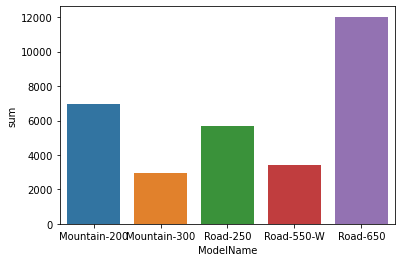

In [17]:
sns.barplot(x=ModelsSale.index, y=ModelsSale['OrderQty']['sum'])

From this chart we can see that the most often selling bike in general between 2012-2013 was Road-650. Is it the most profitable model as well?

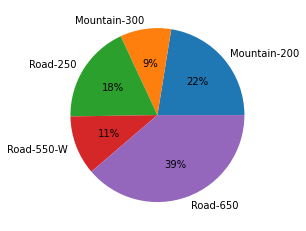

In [18]:
plt.pie(ModelsSale['OrderQty']['sum'], autopct = '%0.0f%%', labels =ModelsSale.index);

<AxesSubplot:xlabel='ModelName', ylabel='sum'>

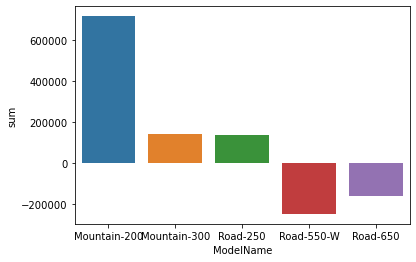

In [19]:
sns.barplot(x=ModelsSale.index, y=ModelsSale['GrossProfit']['sum'])

Unfortunetly no. Also this model plus Road-550-W, gives negative income to the company. I do not know which model has been drop from selling yet, so I can not say that they sell bikes under the standard costs becouse of the end of aveliabiliy of the product. We will see that later. For now I would like to dive deeper. Let's check which specific model sold the best and worst that year

In [20]:
Models_color = bikes.groupby(['ModelName', 'Color', 'Size']).agg({'OrderQty':['sum'], 'GrossProfit': ['mean', 'sum'], 'ROI':['mean']})

In [21]:
Models_color

OrderQty GrossProfit                      ROI
                              sum        mean            sum      mean
ModelName    Color  Size                                              
Mountain-200 Black  38       1364  203.392004  103526.529880  0.195316
                    42       1297  237.528926  120189.636680  0.223500
                    46        967  332.110459  141479.055380  0.290663
             Silver 38       1119  257.104211  116468.207388  0.233132
                    42       1116  252.833666  111499.646820  0.231058
                    46       1112  265.141773  120639.506552  0.239223
Mountain-300 Black  38        684  150.669424   33147.273352  0.082295
                    40        776  167.098676   37263.004660  0.082046
                    44        747  162.369624   37020.274200  0.082814
                    48        740  162.465041   36229.704108  0.082558
Road-250     Black  44        877 -309.572033 -107111.923382  0.050379
                    48        785 -201.812962  -70836.349586  0.067099
                    52        678  -47.588465  -16703.551200  0.116789
                    58        487   23.310499    5850.935200  0.163748
             Red    44        895  243.979810   88808.650985  0.219201
                    48        809  305.275702  114783.663940  0.242369
                    52        639  306.567199   96262.100400  0.237816
                    58        515   82.380789   23396.144000  0.181666
Road-550-W   Yellow 38        846 -229.108682  -67357.952648 -0.021078
                    40        732 -195.001883  -55770.538600 -0.026743
                    42        576 -151.913373  -37370.689800 -0.000804
                    44        421  -89.691442  -16682.608300  0.074110
                    48        850 -243.943759  -69523.971368 -0.017285
Road-650     Black  44        745    0.982577     257.435192  0.068213
                    48        446   32.731538    5924.408400  0.118127
                    52       1528  -50.762232  -20507.941930  0.050470
                    58       1287  -19.593522   -7621.880149  0.059700
                    60        753    7.476210    2026.052876  0.079041
                    62        447   32.458768    5907.495800  0.117287
             Red    44       1517 -281.434673 -111729.565312 -0.053284
                    48       1299  -20.464279   -8185.711440  0.062915
                    52        770   -0.693382    -181.666000  0.065951
                    58        442   51.863887    9750.410800  0.153509
                    60       1500  -67.697694  -26672.891546  0.019827
                    62       1295  -21.604784   -8469.075457  0.060171

In [22]:
Mountain_200 = Models_color.loc['Mountain-200']

In [23]:
Mountain_200

OrderQty GrossProfit                      ROI
                 sum        mean            sum      mean
Color  Size                                              
Black  38       1364  203.392004  103526.529880  0.195316
       42       1297  237.528926  120189.636680  0.223500
       46        967  332.110459  141479.055380  0.290663
Silver 38       1119  257.104211  116468.207388  0.233132
       42       1116  252.833666  111499.646820  0.231058
       46       1112  265.141773  120639.506552  0.239223

<AxesSubplot:xlabel='Color'>

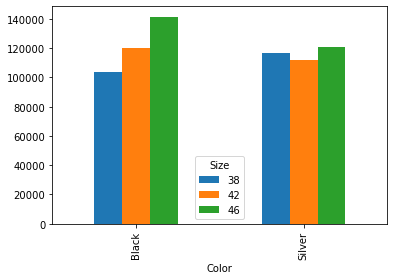

In [24]:
Mountain_200['GrossProfit']['sum'].unstack().plot(kind='bar')

<AxesSubplot:xlabel='Color'>

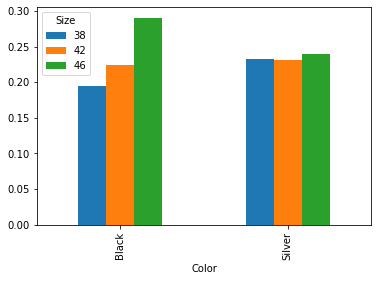

In [25]:
Mountain_200['ROI']['mean'].unstack().plot(kind='bar')

In [26]:
Mountain_300 = Models_color.loc['Mountain-300']

<AxesSubplot:xlabel='Color'>

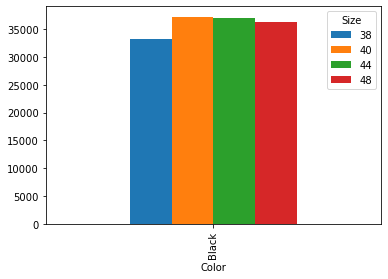

In [27]:
Mountain_300['GrossProfit']['sum'].unstack().plot(kind='bar')

<AxesSubplot:xlabel='Color'>

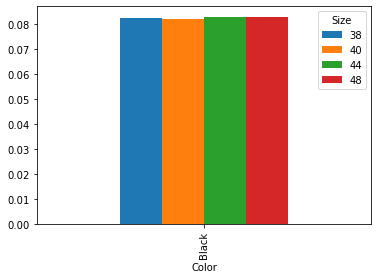

In [28]:
Mountain_300['ROI']['mean'].unstack().plot(kind='bar')

In [29]:
Road_250 = Models_color.loc['Road-250']

<AxesSubplot:xlabel='Color'>

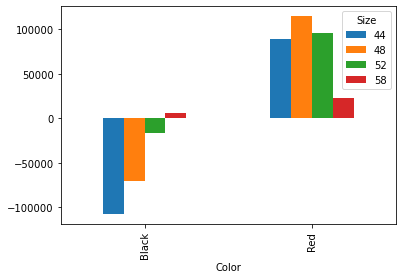

In [30]:
Road_250['GrossProfit']['sum'].unstack().plot(kind='bar')

Here we have sth intresting. The BLACK Road_250 bikes from size 44 to 52 has negative gross profit. Company sell this bikes below the Standard cost. That means that this three models has been removed from sales in next year

In [31]:
Road_550_W = Models_color.loc['Road-550-W']

<AxesSubplot:xlabel='Color'>

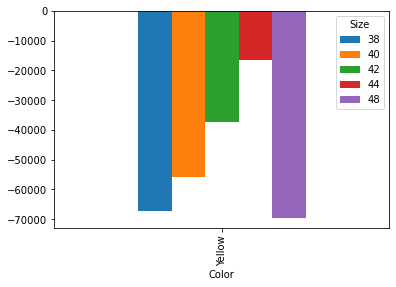

In [32]:
Road_550_W['GrossProfit']['sum'].unstack().plot(kind='bar')

All Road 550 has yellow color and all of them was sold below the Standard Costs

In [33]:
Road_650 = Models_color.loc['Road-650']

<AxesSubplot:xlabel='Color'>

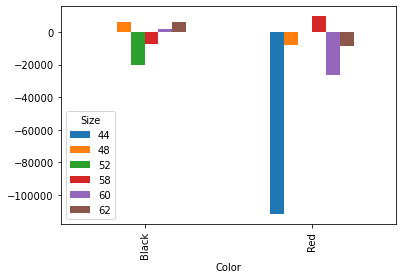

In [34]:
Road_650['GrossProfit']['sum'].unstack().plot(kind='bar')

Here we can see that except black 44, 48, 60, 62 and red 58 Rad-650 bikes has been sold below the standard cost

--------------------------------------------------------------------------------------
I will check in next notebook if all of the underpriced bikes has been removed frm the store...

### Which model has the best/worst profit if we split them by size, color, class separetly

In [35]:
Size_subName = bikes.groupby(['Size','SubName']).agg({'OrderQty':['sum'], 'GrossProfit': ['mean', 'sum'], 'ROI':['mean']})

<AxesSubplot:xlabel='Size'>

<Figure size 864x432 with 0 Axes>

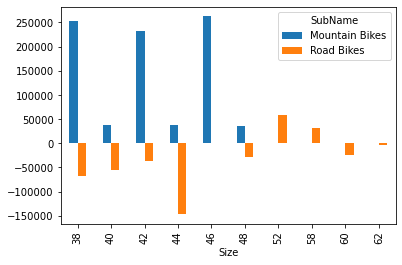

In [36]:
plt.figure(figsize=(12,6))
Size_subName['GrossProfit']['sum'].unstack().plot(kind='bar')

In [37]:
Color_subName = bikes.groupby(['Color','SubName']).agg({'OrderQty':['sum'], 'GrossProfit': ['mean', 'sum'], 'ROI':['mean']})

<AxesSubplot:xlabel='Color'>

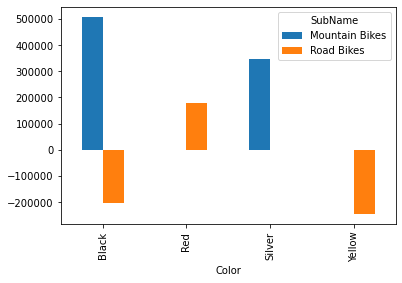

In [38]:
Color_subName['GrossProfit']['sum'].unstack().plot(kind='bar')

In [39]:
Class_subName = bikes.groupby(['class','SubName']).agg({'OrderQty':['sum'], 'GrossProfit': ['mean', 'sum'], 'ROI':['mean']})

<AxesSubplot:xlabel='class'>

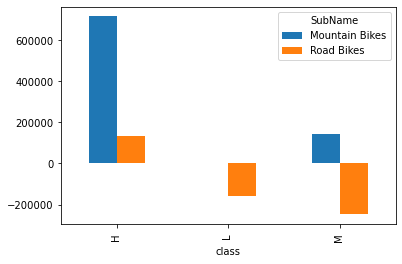

In [40]:
Class_subName['GrossProfit']['sum'].unstack().plot(kind='bar')

We can see that only High class Road Bikes has positive gross profit. And that the high class mountain bikes gives much better income than the rest class

<AxesSubplot:xlabel='class'>

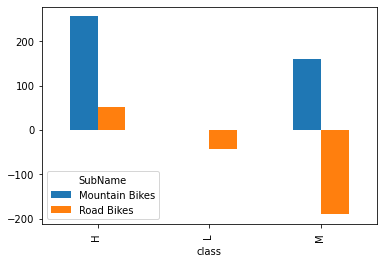

In [41]:
Class_subName['GrossProfit']['mean'].unstack().plot(kind='bar')

If we look at the mean profit it seems the same

In [42]:
teritorry_subName = bikes.groupby(['TerritoryID','SubName']).agg({'OrderQty':['sum'], 'GrossProfit': ['mean', 'sum'], 'ROI':['mean']})

<AxesSubplot:xlabel='TerritoryID'>

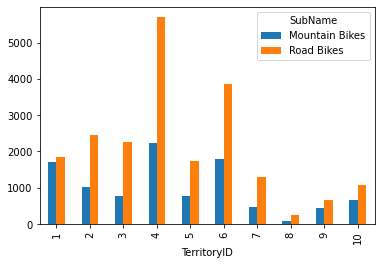

In [48]:
teritorry_subName['OrderQty']['sum'].unstack().plot(kind='bar')

<AxesSubplot:xlabel='TerritoryID'>

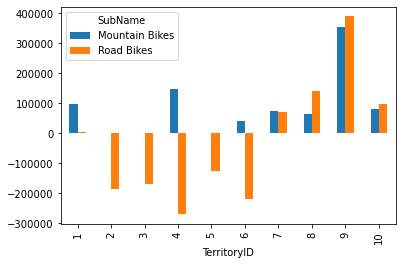

In [43]:
teritorry_subName['GrossProfit']['sum'].unstack().plot(kind='bar')

That is intresting. In territory ID gross profit in RoadBikes was even higher then Mountain bikes. Unfortunetly the rest of sales in different teritory gives pure results 

In [44]:
teritorry_class = bikes.groupby(['TerritoryID','class']).agg({'OrderQty':['sum'], 'GrossProfit': ['mean', 'sum'], 'ROI':['mean']})

<AxesSubplot:xlabel='TerritoryID'>

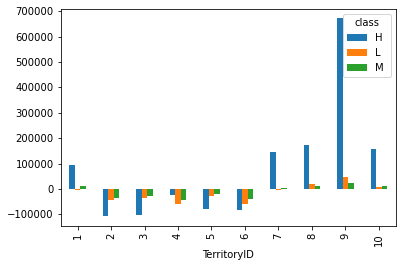

In [45]:
teritorry_class['GrossProfit']['sum'].unstack().plot(kind='bar')

The other important thing is that from TerID 1 the most profitable has been H class models. What about quantity?

<AxesSubplot:xlabel='TerritoryID'>

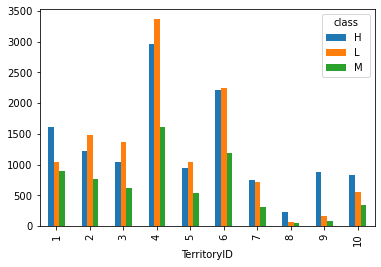

In [46]:
teritorry_class['OrderQty']['sum'].unstack().plot(kind='bar')

It looks like negative income from road bikes decrease territory sell in each mountain bike. That is why the gross profit are pure in teritory 4. We can conclude that there might been some ads targeting with hudge price cutting in this territory grup